In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,5)
%matplotlib inline

import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


# READ IN OUR MUSIC DATASETS BY DECADE
sixties =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-60s.csv')
seventies =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-70s.csv')
eighties =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-80s.csv')
nineties =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-90s.csv')
thousands =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-00s.csv')
tens =pd.read_csv('/Users/User/Documents/Masters/music/dataset-of-10s.csv')

# CREATE A DATASET WITH ALL DECADES
AllDecades = pd.concat([sixties, seventies, eighties, nineties, thousands, tens])
#print (AllDecades)

In [2]:
# OBSERVE THE DATA TO SEE IF DATA NEEDS TO BE CLEANED
# if everything is 0, then there are no null values
pd.isnull(AllDecades).sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [3]:
AllDecades.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [4]:
# we see that loudness has a negative value for decibels. This isn't possible, so lets replace with the absolute value
#AllDecades = AllDecades['loudness'].abs()
#AllDecades.update(AllDecades.select_dtypes(include=[np.number]).abs())
AllDecades.iloc[:,6:7] = AllDecades.iloc[:,6:7].abs()
AllDecades.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,10.222034,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.310646,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,0.149000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,6.374250,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,12.816000,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,49.253000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [5]:
# Recognize whether a column is numerical or categorical.

def utils_recognize_type(AllDecades, col, max_cat=20):
    if (AllDecades[col].dtype == "O") | (AllDecades[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

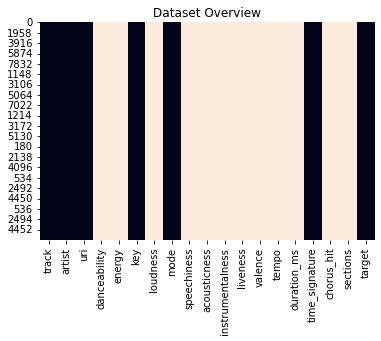

 Categorical   Numeric   NaN 


In [6]:
dic_cols = {col:utils_recognize_type(sixties, col, max_cat=18) for col in sixties.columns}
heatmap = AllDecades.isnull()

for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

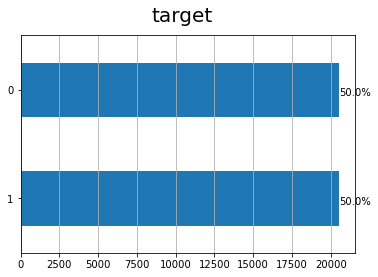

In [7]:
# Observe the proportion of songs on the Hot-100
# The output show that half of the songs on the list are hits
y = "target"
ax = AllDecades[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

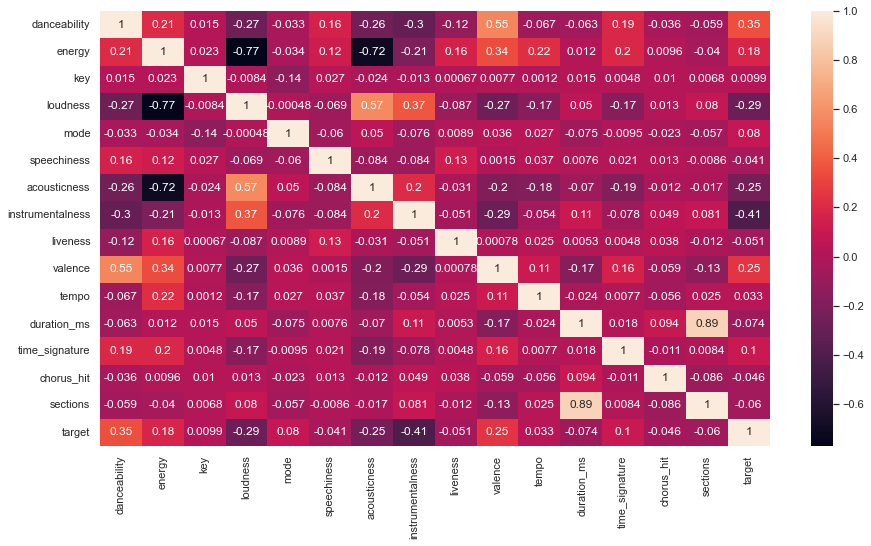

In [8]:
# Let's create a correlation matrix to identify which
# attributes are highly correlated with target.
# This can give us an idea of which datapoints might be strong predictor variables

df = pd.DataFrame(AllDecades,columns=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit','sections', 'target'])
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
# Inspect the Data
AllDecades.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,10.222034,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.310646,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,0.149000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,6.374250,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,12.816000,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,49.253000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [10]:
# Identify what makes a hit song
# We are going to omit Duration_ms from our dataset since its values are far greater than the other attributes

# Independent values 'x'
X = AllDecades[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','chorus_hit','sections']]

# Dependent values 'y'
y = AllDecades[['target']]

In [11]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
# Regression Coefficients 

# A positive coefficient indicates that as the value of the independent variable increases, 
# the mean of the dependent variable also tends to increase. 
# A negative coefficient suggests that as the independent variable increases, 
# the dependent variable tends to decrease.
# Take the absolute value of the coefficient and the greater the value, the greater the predictor

model.coef_

array([[ 5.75652744e-01, -2.88053373e-01,  1.76015310e-03,
        -1.31835894e-02,  6.67213988e-02, -5.58918290e-01,
        -2.38154115e-01, -4.66411928e-01, -6.94816712e-02,
         5.07459736e-02,  1.67093217e-04,  1.99243232e-02,
        -5.19945086e-04, -1.89934945e-03]])

In [13]:
model.intercept_

array([0.56482985])

In [14]:
# Negative Coefficient:

# 9 liveness: -6.94456405e-02
# 13 chorus hit: -5.19881636e-04
# 6 Speechiness: -5.59024304e-01
# 8 Instrumentalness: -4.66460978e-01
# 2 energy: -2.87842568e-01
# 7 Acousticness:  -2.38147378e-01
# 14 sections: -1.90053399e-03

# Postive Coefficient:

# 5 mode: 6.67175843e-02
# 1 danceability: 5.75788126e-01
# 10 valence: 5.07299481e-02
# 12 Time Signature: 1.99197698e-02
# 3 key: 1.75995712e-03
# 11 tempo: 1.67125284e-04
# 4 loudness: 1.31668965e-02


# There are multiple ways to determine the best predictor. 
# One of the most easy way is to first see correlation matrix even before you perform the regression. 
# Generally variable with highest correlation is a good predictor. 
# You can also compare coefficients to select the best predictor 
# (Make sure you have normalized the data before you perform regression and 
# you take absolute value of coefficients) You can also look change in R-squared value. 
# Trying removing each one of them and see which variable causes maximum change.

In [15]:
# Accuracy assessment: R2
model.score(X, y)

0.2613895551556571

In [16]:
# We can see in the above output that our Regression Model is not a great predictor

In [17]:
# Let's build a Machine Learning model to see if we can classify our hits. 

In [18]:
# Create two separate lists, Spotify features and actual song traits
spot_features = ['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness','valence']
song_traits = ['key', 'loudness','tempo', 'time_signature', 'chorus_hit','sections'] 

In [19]:
# Separate Hot-100's and Nots, focus on just the spotify features
hot_100 = AllDecades[spot_features].loc[AllDecades['target'] == 1]
not_100 = AllDecades[spot_features].loc[AllDecades['target'] == 0]

In [20]:
#create a dataframe that includes the means for hits and flops
hot_mean= pd.DataFrame(hot_100.describe().loc['mean'])
not_mean = pd.DataFrame(not_100.describe().loc['mean'])

Means = pd.concat([hot_mean,not_mean], axis = 1)
Means.columns = ['hot_mean', 'not_mean']

print(Means)

                  hot_mean   not_mean
danceability      0.601237   0.478153
energy            0.624296   0.534794
key               5.248528   5.178660
loudness          8.702460  11.741608
mode              0.730064   0.656644
speechiness       0.069444   0.076477
acousticness      0.280814   0.447581
instrumentalness  0.030687   0.278145
liveness          0.192637   0.210432
valence           0.609578   0.475302


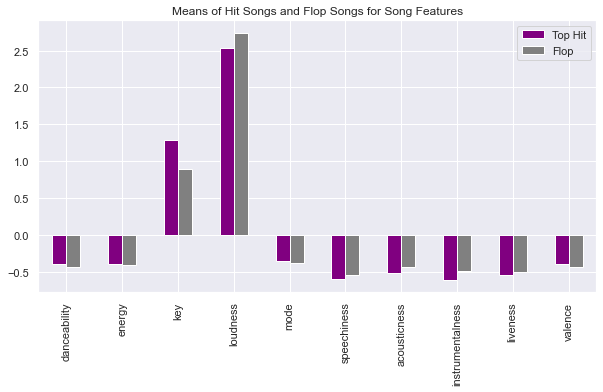

In [21]:
# Scale the Data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
means_scaled = pd.DataFrame(ss.fit_transform(Means),index= Means.index, columns = Means.columns)
means_scaled


means_scaled.plot(kind = 'bar', figsize=(10, 5), color = ('purple', 'grey'), title = 'Means of Hit Songs and Flop Songs for Song Features')
plt.legend(labels=['Top Hit', 'Flop'], loc='upper right')
plt.show()
plt.show()

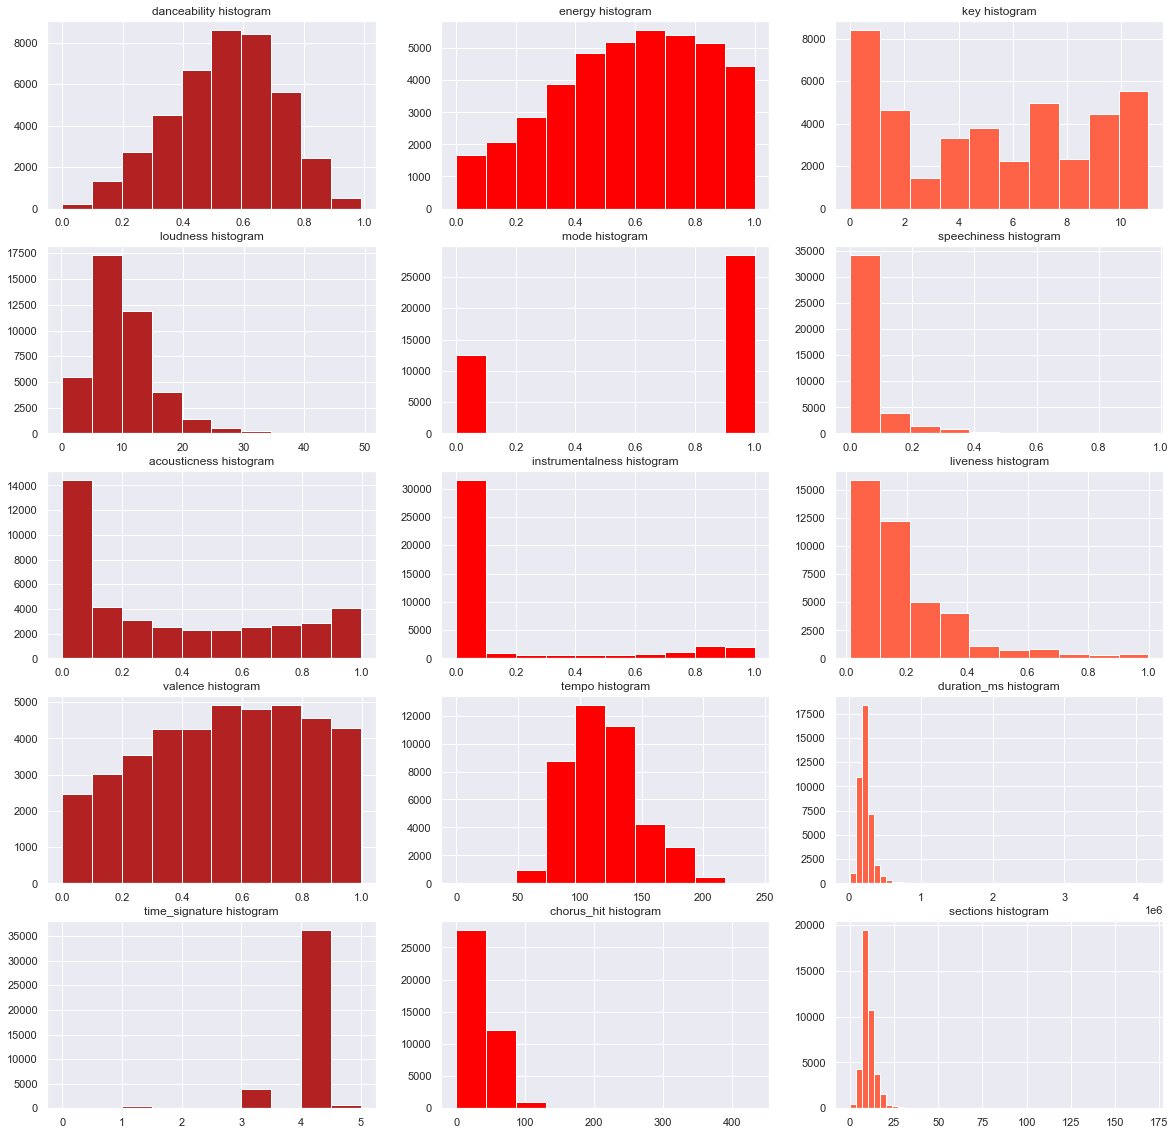

In [22]:
#create histograpms of all the variables to see distributions
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(AllDecades[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'firebrick')
hist_plot(0, 1, 'energy', 10, 'red')
hist_plot(0, 2, 'key', 10, 'tomato')
hist_plot(1,0, 'loudness', 10, 'firebrick')
hist_plot(1,1, 'mode', 10, 'red')
hist_plot(1,2, 'speechiness', 10, 'tomato')
hist_plot(2,0, 'acousticness', 10, 'firebrick')
hist_plot(2,1, 'instrumentalness', 10, 'red')
hist_plot(2,2, 'liveness', 10, 'tomato')
hist_plot(3,0, 'valence', 10, 'firebrick')
hist_plot(3,1, 'tempo', 10, 'red')
hist_plot(3,2, 'duration_ms', 50, 'tomato')
hist_plot(4,0, 'time_signature', 10, 'firebrick')
hist_plot(4,1, 'chorus_hit', 10, 'red')
hist_plot(4,2, 'sections', 50, 'tomato')

plt.show()

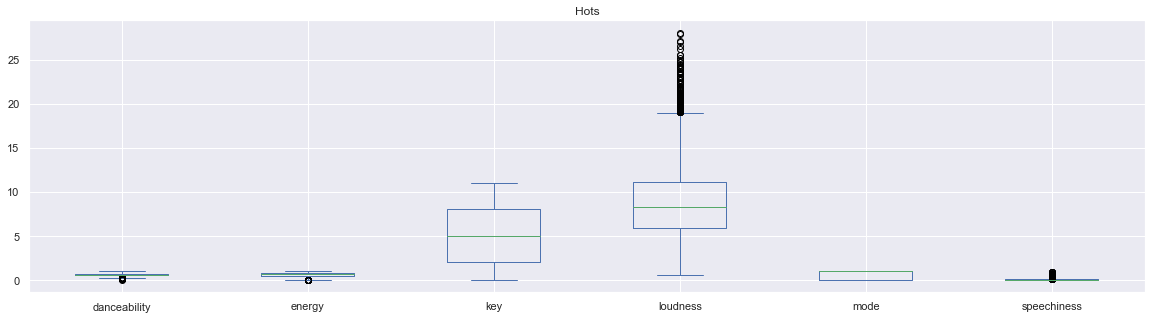

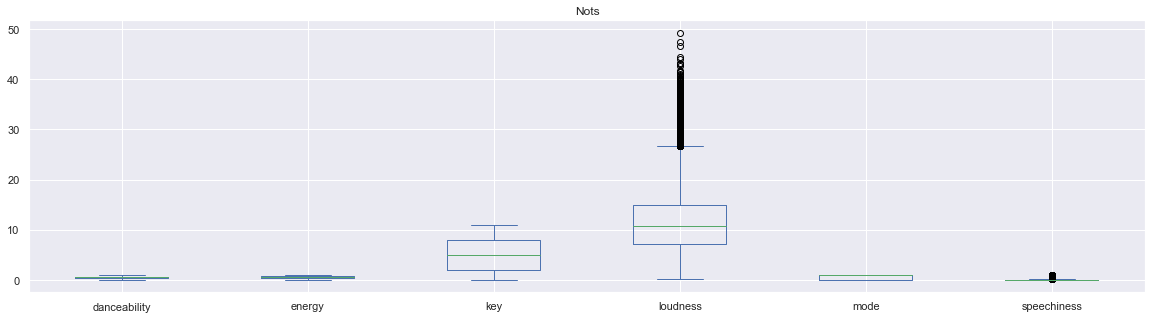

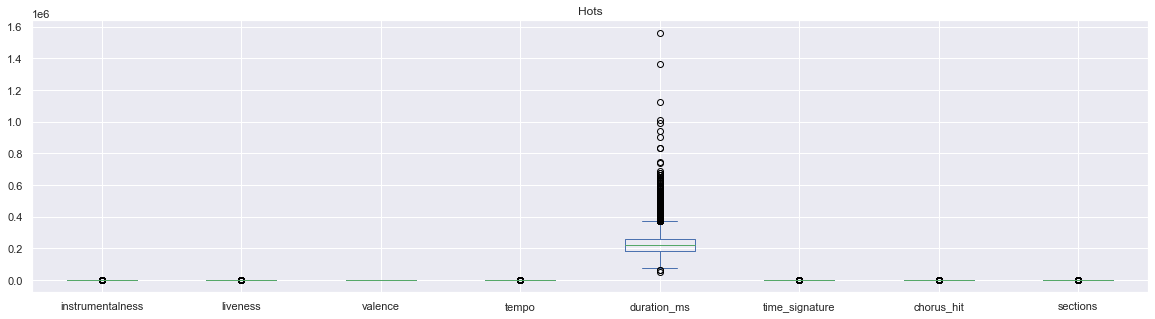

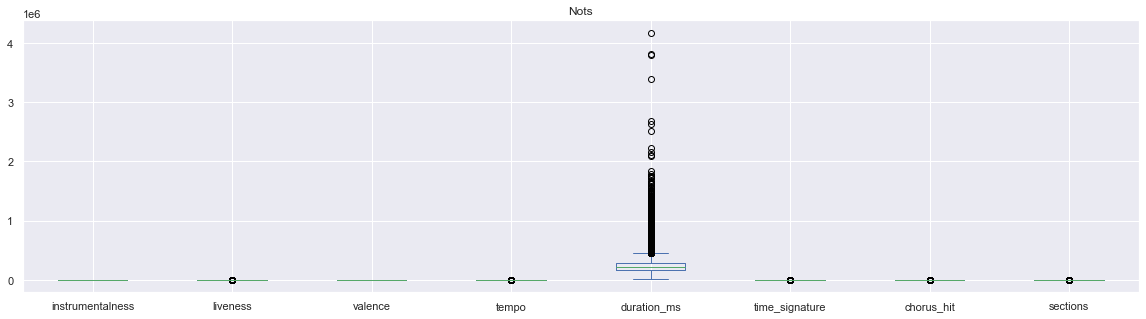

In [23]:
# boxplots to see the spread of the song features and any differences between hots and nots.

mpl.rcParams['figure.figsize']=(20,5)
AllDecades[AllDecades['target']==1].iloc[:, 0:9].plot(kind='box', title = 'Hots')
plt.show()
AllDecades[AllDecades['target']==0].iloc[:, 0:9].plot(kind='box', title = 'Nots')
plt.show()

AllDecades[AllDecades['target']==1].iloc[:, 10:18].plot(kind='box', title = 'Hots')
plt.show()
AllDecades[AllDecades['target']==0].iloc[:, 10:18].plot(kind='box', title = 'Nots')
plt.show()

In [24]:
# Let's see if we can use Random Forest to identify the hots and not

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

independent = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = AllDecades[independent]
y = AllDecades['target']

#use 75% of the data for training the model and 25% of the model for testing
RF = RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) 
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

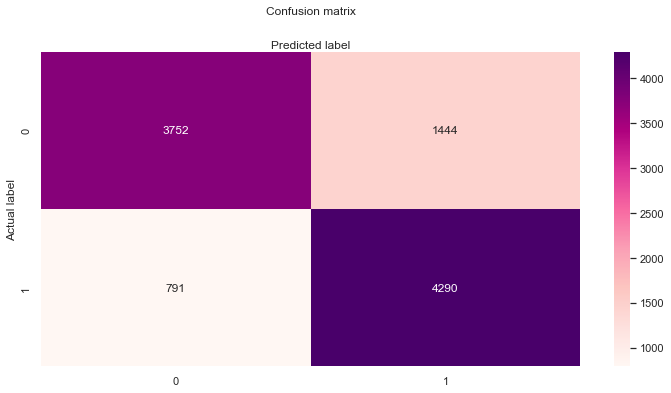

In [25]:
#create a confusion matrix to see the efficacy of the model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#create a figure/heatmap of the confusion matrix for a better visual
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
# We can see above in our model that we DID identify the True Positives (Top Left Quadrant) and True Negatives most of the time (Bottom Right Quadrant)
# Let's see the actual numbers

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7825240829035711
Precision: 0.7481688175793513
Recall: 0.8443219838614446


In [27]:
# Finally, Let's Identify the most imporant predictors of a hit song

Features = RF.feature_importances_
IndependentVars = pd.DataFrame(independent)
Features_df = pd.DataFrame(Features)

# Union the DataFrames
Feat_Vars = pd.concat([IndependentVars, Features_df], axis = 1)
Feat_Vars.columns = ['Variable', 'Feature importance all decades']
Feat_Vars = Feat_Vars.set_index('Variable')
Feat_Vars = Feat_Vars.sort_values(by=['Feature importance all decades'], ascending = False)
Feat_Vars

,Feature importance all decades
Variable,
instrumentalness,0.174165
acousticness,0.109129
danceability,0.098250
energy,0.084856
loudness,0.076755
speechiness,0.072770
duration_ms,0.072707
valence,0.071182
tempo,0.054029


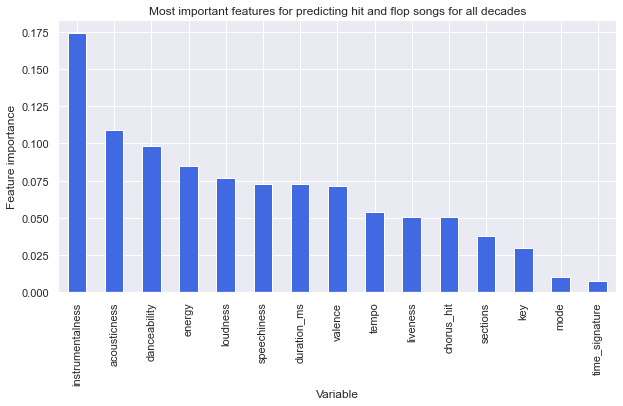

In [28]:
# Its a little difficult to read the above list, so plot the values
Feat_Vars.plot(kind='bar', color = "royalblue", title = "Most important features for predicting hit and flop songs for all decades", legend = None)
plt.ylabel('Feature importance')
plt.show()